In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x)


In [161]:
vg = pd.read_csv('vgsales.csv')

In [203]:
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0000,Sports,Nintendo,41.4900,29.0200,3.7700,8.4600,82.7400
1,2,Super Mario Bros.,NES,1985.0000,Platform,Nintendo,29.0800,3.5800,6.8100,0.7700,40.2400
2,3,Mario Kart Wii,Wii,2008.0000,Racing,Nintendo,15.8500,12.8800,3.7900,3.3100,35.8200
3,4,Wii Sports Resort,Wii,2009.0000,Sports,Nintendo,15.7500,11.0100,3.2800,2.9600,33.0000
4,5,Pokemon Red/Pokemon Blue,GB,1996.0000,Role-Playing,Nintendo,11.2700,8.8900,10.2200,1.0000,31.3700


In [163]:
vg.shape

(16598, 11)

<AxesSubplot:>

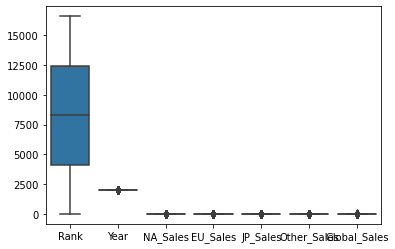

In [198]:
#check the outlayers 
sns.boxplot(data=vg)

In [164]:
#Explore the number of columns and rows in my data set and the data type for each series.
#I found these columns 'Year' and 'Publisher' has null values
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [165]:
#explore the data statistical 

vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.0000,16327.0000,16598.0000,16598.0000,16598.0000,16598.0000,16598.0000
mean,8300.6053,2006.4064,0.2647,0.1467,0.0778,0.0481,0.5374
std,4791.8539,5.8290,0.8167,0.5054,0.3093,0.1886,1.5550
min,1.0000,1980.0000,0.0000,0.0000,0.0000,0.0000,0.0100
25%,4151.2500,2003.0000,0.0000,0.0000,0.0000,0.0000,0.0600
50%,8300.5000,2007.0000,0.0800,0.0200,0.0000,0.0100,0.1700
75%,12449.7500,2010.0000,0.2400,0.1100,0.0400,0.0400,0.4700
max,16600.0000,2020.0000,41.4900,29.0200,10.2200,10.5700,82.7400


In [166]:
#descover the number of null values so i can choose the way how to deal with it.
vg.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [167]:
#dealing with null values in Year column.
#i want ot replace the null values with the frequential year 
vg.Year.value_counts()


2009.0000    1431
2008.0000    1428
2010.0000    1259
2007.0000    1202
2011.0000    1139
2006.0000    1008
2005.0000     941
2002.0000     829
2003.0000     775
2004.0000     763
2012.0000     657
2015.0000     614
2014.0000     582
2013.0000     546
2001.0000     482
1998.0000     379
2000.0000     349
2016.0000     344
1999.0000     338
1997.0000     289
1996.0000     263
1995.0000     219
1994.0000     121
1993.0000      60
1981.0000      46
1992.0000      43
1991.0000      41
1982.0000      36
1986.0000      21
1983.0000      17
1989.0000      17
1990.0000      16
1987.0000      16
1988.0000      15
1984.0000      14
1985.0000      14
1980.0000       9
2017.0000       3
2020.0000       1
Name: Year, dtype: int64

In [168]:
#fill the null values with 2009 becouse it is the most frequential year
vg.Year.fillna(2009,inplace=True)

In [169]:
#check 
vg.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [170]:
#deal with null values in Publisher column.
vg.dropna(subset=['Publisher'],inplace=True)

In [171]:
#check

vg.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [172]:
#ANSWERING MY QUESTIONS PART:

# what is the year that has the highest global sales in video games market around over the world ?

In [173]:
a=vg.groupby(['Year'])[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False)
a

,Global_Sales
Year,
2009.0000,760.8900
2008.0000,678.9000
2007.0000,609.9200
2010.0000,600.2900
2006.0000,521.0400
2011.0000,515.8000
2005.0000,458.5100
2004.0000,414.0100
2002.0000,395.5200


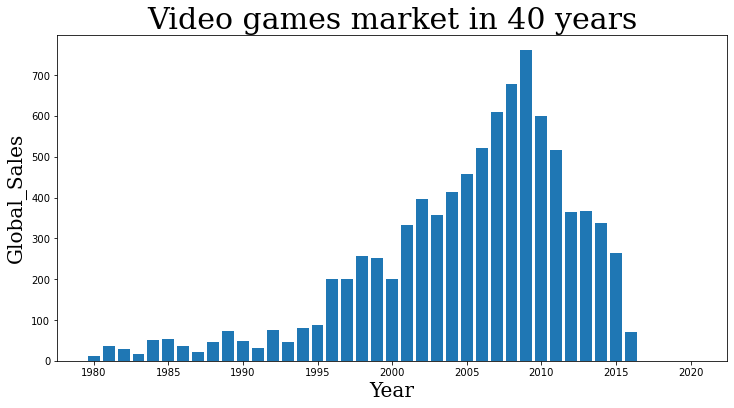

In [199]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.Global_Sales);
plt.title('Video games market in 40 years',fontsize=30,color='black',family='serif');
plt.xlabel('Year',fontsize=20,color='black',family='serif');
plt.ylabel('Global_Sales',fontsize=20,color='black',family='serif');

In [175]:
#what are the companies that are dominant in the market for 40 years?

In [176]:
b=vg.groupby(['Publisher'])[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False)
bc=b.head(5)
bc

,Global_Sales
Publisher,
Nintendo,1786.5600
Electronic Arts,1110.3200
Activision,727.4600
Sony Computer Entertainment,607.5000
Ubisoft,474.7200


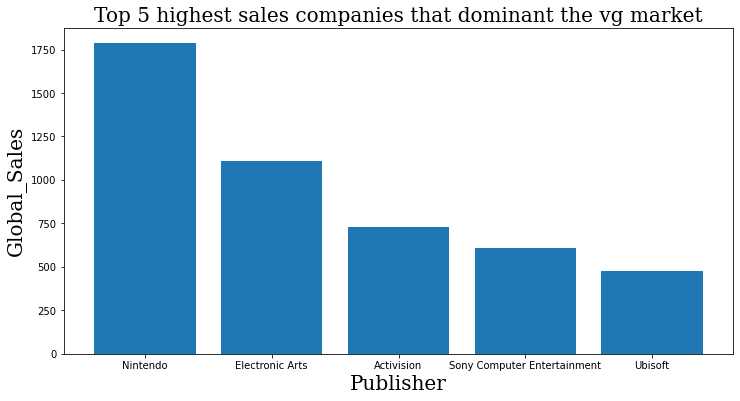

In [209]:
plt.figure(figsize=[12,6]);
plt.bar(bc.index,bc.Global_Sales);
plt.title('Top 5 highest sales companies that dominant the vg market',fontsize=20,color='black',family='serif');
plt.xlabel('Publisher',fontsize=20,color='black',family='serif');
plt.ylabel('Global_Sales',fontsize=20,color='black',family='serif');

# what is the most type of games has the highest sales in each country so the companies can focus on to raise their sales?

In [178]:
#here we see that people in North America prefer action games so the companies can target them and start ad their action games there so they will get high sales 

In [179]:
c=vg.groupby(['Genre'])[['NA_Sales']].sum().sort_values('NA_Sales', ascending=False)
c

,NA_Sales
Genre,
Action,877.5400
Sports,682.5400
Shooter,582.5900
Platform,447.0500
Misc,404.6700
Racing,359.4200
Role-Playing,327.2800
Fighting,221.9200
Simulation,183.3100


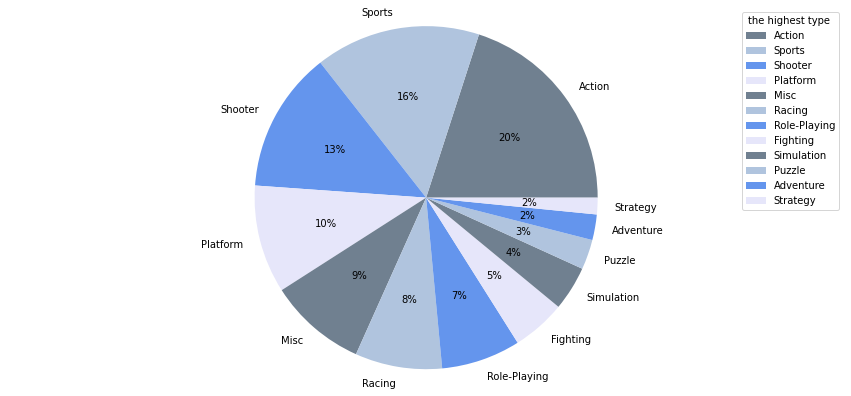

In [180]:
plt.figure(figsize=[15,7]);
plt.pie(c.NA_Sales ,labels=['Action','Sports','Shooter','Platform','Misc','Racing','Role-Playing','Fighting','Simulation','Puzzle',
'Adventure'
,'Strategy'] , colors = ['slategray','lightsteelblue','cornflowerblue','lavender'], autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "the highest type ");

In [181]:
#here we see that people in Europe prefer action games so the companies can target them and start ad their action games there so they will get high sales 

In [182]:
d=vg.groupby(['Genre'])[['EU_Sales']].sum().sort_values('EU_Sales', ascending=False)
d

,EU_Sales
Genre,
Action,524.9200
Sports,376.3000
Shooter,313.2400
Racing,238.3800
Misc,213.9300
Platform,201.1300
Role-Playing,188.0500
Simulation,113.2000
Fighting,100.2200


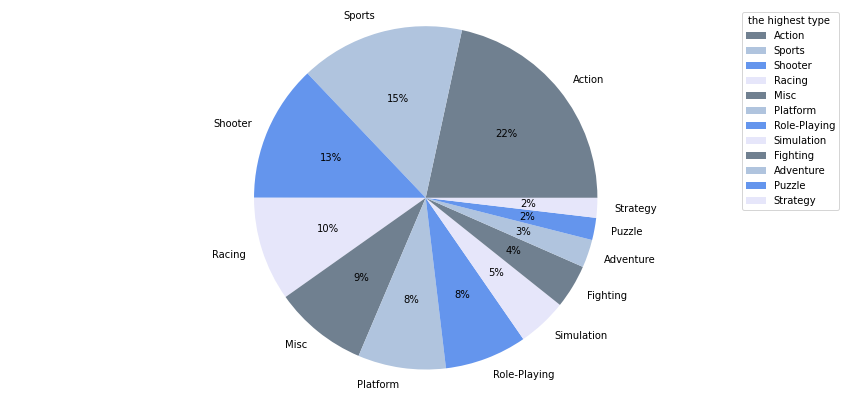

In [183]:
plt.figure(figsize=[15,7]);
plt.pie(d.EU_Sales ,labels=['Action','Sports','Shooter','Racing','Misc','Platform','Role-Playing','Simulation','Fighting','Adventure','Puzzle','Strategy'] , colors = ['slategray','lightsteelblue','cornflowerblue','lavender'], autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "the highest type ");

In [184]:
#here we see that people in Japan prefer Role-Playing games so the companies can target them and start ad their action games there so they will get high sales 

In [185]:
e=vg.groupby(['Genre'])[['JP_Sales']].sum().sort_values('JP_Sales', ascending=False)
e

,JP_Sales
Genre,
Role-Playing,352.2600
Action,159.4900
Sports,135.2500
Platform,130.7700
Misc,107.7200
Fighting,87.3500
Simulation,63.6400
Puzzle,57.3100
Racing,56.6900


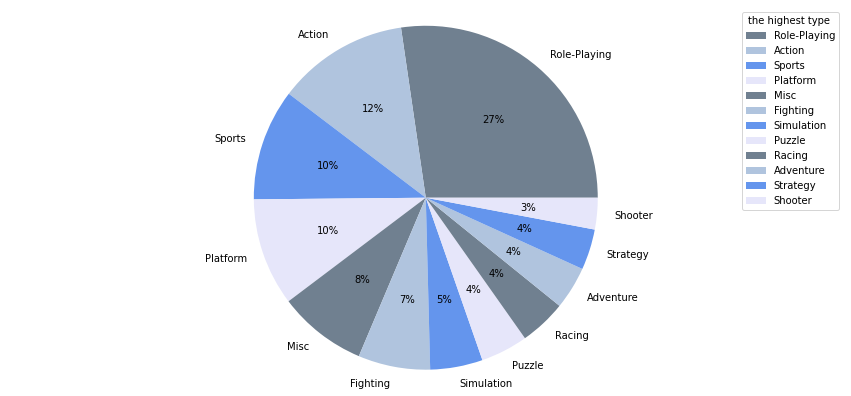

In [186]:
plt.figure(figsize=[15,7]);
plt.pie(e.JP_Sales ,labels=['Role-Playing','Action','Sports','Platform','Misc','Fighting','Simulation','Puzzle','Racing','Adventure','Strategy','Shooter'] , colors = ['slategray','lightsteelblue','cornflowerblue','lavender'], autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "the highest type ");

In [187]:
#here we see that people in the rest of the world prefer action games.

In [188]:
f=vg.groupby(['Genre'])[['Other_Sales']].sum().sort_values('Other_Sales', ascending=False)
f

,Other_Sales
Genre,
Action,187.3500
Sports,134.8700
Shooter,102.6900
Racing,77.2700
Misc,75.2200
Role-Playing,59.6100
Platform,51.5900
Fighting,36.2400
Simulation,31.5200


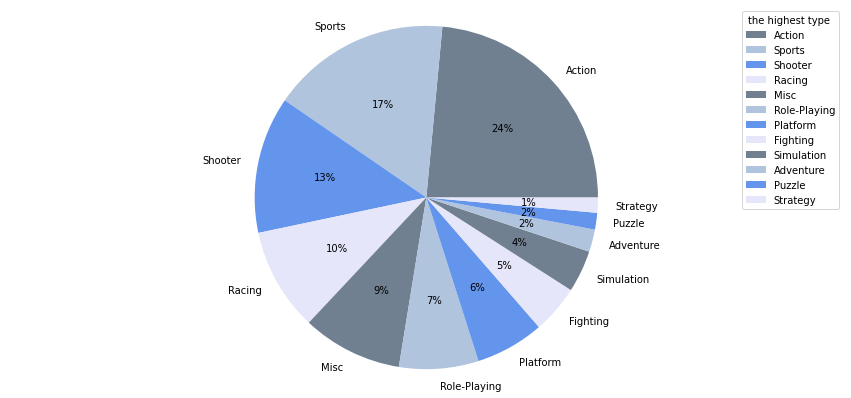

In [189]:
plt.figure(figsize=[15,7]);
plt.pie(f.Other_Sales ,labels=['Action','Sports','Shooter','Racing','Misc','Role-Playing','Platform','Fighting','Simulation','Adventure','Puzzle','Strategy'] , colors = ['slategray','lightsteelblue','cornflowerblue','lavender'], autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "the highest type ");

In [190]:
#are ppl interest in games changed by time?
#does the sales increased in in 1980 till 1999 and from 2000 utill 2020?

In [191]:
#split my data in year column into 2 generations
second_genereation = vg[(vg['Year']>=2000) & (vg['Year']<=2020)]


In [192]:
first_genereation= vg[(vg['Year']>=1880) & (vg['Year']<=1999)]

In [221]:
n= first_genereation.groupby('Genre')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False)
n

,Global_Sales
Genre,
Platform,331.1800
Role-Playing,199.7700
Action,190.4700
Sports,178.8500
Racing,162.5000
Fighting,130.6900
Shooter,128.7400
Puzzle,101.7200
Misc,71.9900


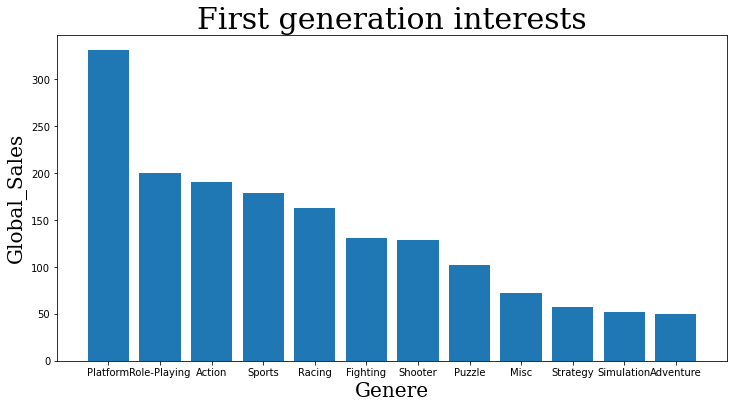

In [194]:
plt.figure(figsize=[12,6]);
plt.bar(n.index,n.Global_Sales);
plt.title('First generation interests',fontsize=30,color='black',family='serif');
plt.xlabel('Genere',fontsize=20,color='black',family='serif');
plt.ylabel('Global_Sales',fontsize=20,color='black',family='serif');

In [195]:
g= second_genereation.groupby('Genre')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False)
g

,Global_Sales
Genre,
Action,1559.8600
Sports,1150.5000
Shooter,908.5800
Misc,730.1600
Role-Playing,727.5400
Racing,569.5300
Platform,499.6900
Simulation,339.4000
Fighting,315.0100


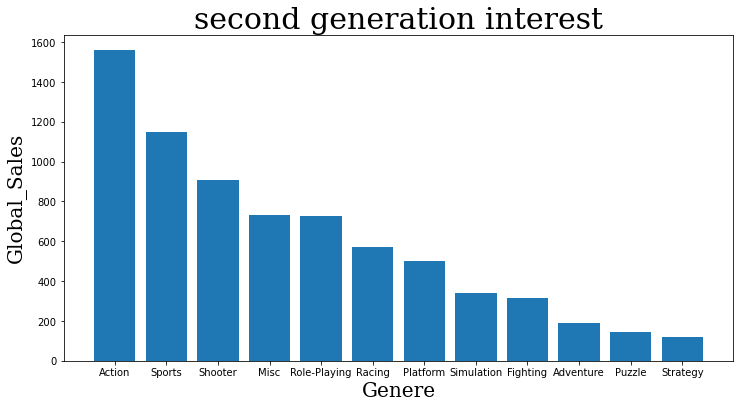

In [196]:
plt.figure(figsize=[12,6]);
plt.bar(g.index,g.Global_Sales);
plt.title('second generation interest',fontsize=30,color='black',family='serif');
plt.xlabel('Genere',fontsize=20,color='black',family='serif');
plt.ylabel('Global_Sales',fontsize=20,color='black',family='serif');

In [ ]:
#ELAF TALAL ALMOHAMMADI